# Task Part 1

### This script contains the following points:

#### Wrangling and Data Security
#### Creating Crosstabs
#### Create Customer Profiles
#### Customer Profile Exploration

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns

In [2]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis'

In [3]:
final_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customers_merged.pkl'))

In [4]:
#view all the column headings to see what isn't relevant to analysis
pd.options.display.max_columns = None

In [5]:
final_merged.head()

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Data Security and Wrangling

In [6]:
#drop columns irrelevant to analysis
final_merged = final_merged.drop(columns = ['order_id','first_order','product_id','add_to_cart_order','reordered','product_name','aisle_id','busiest_days','max_order','avg_spend','median_dspo','date_joined','_merge'])

In [7]:
final_merged.shape

(32089823, 21)

In [8]:
#data security and addressing PII
final_merged = final_merged.drop(columns = ['First Name','Last Name'])

First and Last Name were removed as they are columns that can be used to trace back to single individuals. While scrubbing may not be advisable, this is all that's been suggested from the Achievement so far for data security. 

In [9]:
#create a regions variable
final_merged.loc[final_merged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'region'] = 'Northeast'


In [10]:
final_merged.loc[final_merged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'


In [11]:
final_merged.loc[final_merged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'


In [12]:
final_merged.loc[final_merged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'


### Creating Crosstabs

In [13]:
#check the new columns to make sure it's consistent with the state column
crosstab_region = pd.crosstab(final_merged['region'], final_merged['STATE'], dropna = False)

In [14]:
crosstab_region

STATE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0,0,0,0,0,0,0,0,0,0,0,0,0,627269,620945,618138,630269,0,0,0,0,0,626008,643603,0,633997,0,621109,0,0,0,0,0,0,632524,622358,0,0,0,0,0,628387,0,0,0,0,0,0,0,619810,0
Northeast,0,0,0,0,0,0,616165,0,0,0,0,0,0,0,0,0,0,0,0,630733,0,639850,0,0,0,0,0,0,0,612032,621441,0,629664,0,0,0,0,0,660551,650557,0,0,0,0,0,601959,0,0,0,0,0
South,630573,0,0,629424,0,0,0,630701,608265,623554,647993,0,0,0,0,0,0,627092,631113,0,622248,0,0,0,625730,0,0,0,0,0,0,0,0,646469,0,0,645192,0,0,0,631977,0,610317,635240,0,0,634241,0,606010,0,0
West,0,642660,649575,0,653455,632613,0,0,0,0,0,625223,598716,0,0,0,0,0,0,0,0,0,0,0,0,0,630980,0,631200,0,0,647637,0,0,0,0,0,630415,0,0,0,0,0,0,607125,0,0,627152,0,0,639564


In [15]:
#is there a difference in spending habits across regions?
crosstab_prices = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False)

In [16]:
crosstab_prices

spending_flag,High Spender,Low Spender
region,,
Midwest,153928,7370489
Northeast,108001,5554951
South,208364,10477775
West,159051,8057264


It's a bit hard to compare the differences in spending habits between regions here, as some regions like the South have many more states than others. Lets look at this crosstab again but as percents:

In [17]:
crosstab_prices_percent = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False, normalize = 'index').round(2)

In [18]:
crosstab_prices_percent

spending_flag,High Spender,Low Spender
region,,
Midwest,0.02,0.98
Northeast,0.02,0.98
South,0.02,0.98
West,0.02,0.98


Here we can see that the proportion of high spenders to low spenders across regions is the same. We don't observe any significant difference in spending habits controlling for region.

In [19]:
#create an exclusion flag for low-activity customers
final_merged.loc[final_merged['user_order_num'] < 5, 'low_activity_customer'] = True

In [20]:
final_merged.loc[final_merged['user_order_num'] >= 5, 'low_activity_customer'] = False

In [21]:
final_merged_excluded = final_merged[final_merged['low_activity_customer'] == False]

In [22]:
final_merged_excluded.head(10)

,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,num_dependants,fam_status,income,region,low_activity_customer
4,1,5,4,15,28.0,7,9.0,Mid-Range Product,Least Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
5,1,6,2,7,19.0,7,9.0,Mid-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
6,1,7,1,9,20.0,7,9.0,Mid-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
7,1,8,1,14,14.0,7,9.0,Mid-Range Product,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
8,1,9,1,16,0.0,7,9.0,Mid-Range Product,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
9,1,10,4,8,30.0,7,9.0,Mid-Range Product,Least Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
15,1,5,4,15,28.0,19,4.4,Low-Range Product,Least Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
16,1,6,2,7,19.0,19,4.4,Low-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
17,1,7,1,9,20.0,19,4.4,Low-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False
18,1,8,1,14,14.0,19,4.4,Low-Range Product,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False


In [23]:
final_merged_excluded.shape

(24177845, 21)

In [30]:
#export this new dataframe
final_merged_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_merged_excluded.pkl'))

### Create Customer Profiles

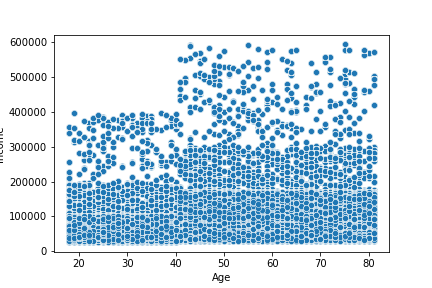

In [24]:
#this is the scatterplot from the last Exercise that demonstrates the relationship between age and income.
from IPython.display import Image
Image("/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis/04 Analysis/Visualizations/scat_age_inc.png")

In [25]:
#identify upper, middle, and lower class thresholds for above and below 40 years old
df_young = final_merged_excluded[final_merged_excluded['Age']<40]
df_old = final_merged_excluded[final_merged_excluded['Age']>=40]


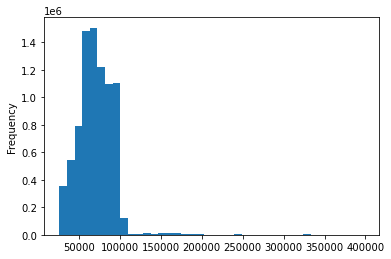

In [26]:
hist_1 = df_young['income'].plot.hist(bins = 40)

Outliers of those with high incomes we saw in scatterplot appear around incomes above 110,000 for the group under the age of 40. We can refer to these as the upper-class for income groups.

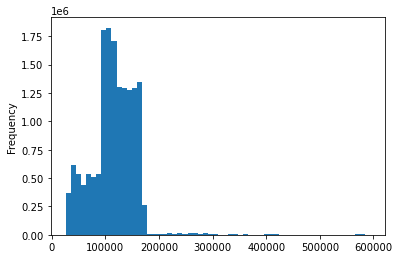

In [27]:
hist_2 = df_old['income'].plot.hist(bins = 60)

Outliers begin around incomes above 180,000 for 40+ y/o's.

In [28]:
#find medians of income for age groups above and below 40
final_merged_excluded[final_merged_excluded['Age']<40].agg({'income':['median']})

,income
median,69218.0


In [29]:
final_merged_excluded[final_merged_excluded['Age']>=40].agg({'income':['median']})

,income
median,115363.0


In [30]:
#create flag variable profiles for age, dependents, goods, and income

In [31]:
#age
final_merged_excluded.loc[final_merged_excluded['Age']<40, 'age_group'] = 'Young'
final_merged_excluded.loc[final_merged_excluded['Age']>=40, 'age_group'] = 'Old'

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
#dependents
final_merged_excluded.loc[final_merged_excluded['num_dependants']>0, 'has_dependents'] = True
final_merged_excluded.loc[final_merged_excluded['num_dependants']==0, 'has_dependents'] = False

In [33]:
#goods
final_merged_excluded.loc[final_merged_excluded['department_id']==1, 'department'] = 'Frozen'
final_merged_excluded.loc[final_merged_excluded['department_id']==2, 'department'] = 'Other'
final_merged_excluded.loc[final_merged_excluded['department_id']==3, 'department'] = 'Bakery'
final_merged_excluded.loc[final_merged_excluded['department_id']==4, 'department'] = 'Produce'
final_merged_excluded.loc[final_merged_excluded['department_id']==5, 'department'] = 'Alcohol'
final_merged_excluded.loc[final_merged_excluded['department_id']==6, 'department'] = 'International'
final_merged_excluded.loc[final_merged_excluded['department_id']==7, 'department'] = 'Beverages'
final_merged_excluded.loc[final_merged_excluded['department_id']==8, 'department'] = 'Pets'
final_merged_excluded.loc[final_merged_excluded['department_id']==9, 'department'] = 'Dry Goods Pasta'
final_merged_excluded.loc[final_merged_excluded['department_id']==10, 'department'] = 'Bulk'
final_merged_excluded.loc[final_merged_excluded['department_id']==11, 'department'] = 'Personal Care'
final_merged_excluded.loc[final_merged_excluded['department_id']==12, 'department'] = 'Meat Seafood'
final_merged_excluded.loc[final_merged_excluded['department_id']==13, 'department'] = 'Pantry'
final_merged_excluded.loc[final_merged_excluded['department_id']==14, 'department'] = 'Breakfast'
final_merged_excluded.loc[final_merged_excluded['department_id']==15, 'department'] = 'Canned Goods'
final_merged_excluded.loc[final_merged_excluded['department_id']==16, 'department'] = 'Dairy Eggs'
final_merged_excluded.loc[final_merged_excluded['department_id']==17, 'department'] = 'Household'
final_merged_excluded.loc[final_merged_excluded['department_id']==18, 'department'] = 'Babies'
final_merged_excluded.loc[final_merged_excluded['department_id']==19, 'department'] = 'Snacks'
final_merged_excluded.loc[final_merged_excluded['department_id']==20, 'department'] = 'Deli'
final_merged_excluded.loc[final_merged_excluded['department_id']==21, 'department'] = 'Missing'

In [34]:
#income
final_merged_excluded.loc[(final_merged_excluded['income']>=110000) & (final_merged_excluded['age_group']=='Young'),'income_class'] = 'Upper-Class'
final_merged_excluded.loc[(final_merged_excluded['income']>=70000) & (final_merged_excluded['income']<110000) & (final_merged_excluded['age_group']=='Young'),'income_class'] = 'Middle-Class'
final_merged_excluded.loc[(final_merged_excluded['income']<70000) & (final_merged_excluded['age_group']=='Young'),'income_class'] = 'Lower-Class'

final_merged_excluded.loc[(final_merged_excluded['income']>=180000) & (final_merged_excluded['age_group']=='Old'),'income_class'] = 'Upper-Class'
final_merged_excluded.loc[(final_merged_excluded['income']>=115000) & (final_merged_excluded['income']<180000) & (final_merged_excluded['age_group']=='Old'),'income_class'] = 'Middle-Class'
final_merged_excluded.loc[(final_merged_excluded['income']<115000) & (final_merged_excluded['age_group']=='Old'),'income_class'] = 'Lower-Class'


In [35]:
#create a customer profile variables based on age, dependents, and income
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Young Upper-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Young Upper-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Middle-Class'), 'customer_profile'] = 'Young Middle-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Middle-Class'), 'customer_profile'] = 'Young Middle-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Young Lower-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Young Lower-Class (ND)'

final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Old Upper-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Old Upper-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Middle-Class'), 'customer_profile'] = 'Old Middle-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Middle-Class'), 'customer_profile'] = 'Old Middle-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Old Lower-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Old Lower-Class (ND)'


In [36]:
final_merged_excluded.head()

,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,num_dependants,fam_status,income,region,low_activity_customer,age_group,has_dependents,department,income_class,customer_profile
4,1,5,4,15,28.0,7,9.0,Mid-Range Product,Least Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
5,1,6,2,7,19.0,7,9.0,Mid-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
6,1,7,1,9,20.0,7,9.0,Mid-Range Product,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
7,1,8,1,14,14.0,7,9.0,Mid-Range Product,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
8,1,9,1,16,0.0,7,9.0,Mid-Range Product,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)


The "D" and "ND" in the names for each customer profile stand for "Dependents" and "No Dependents".

In [37]:
#make sure the customer_profile column executed properly
final_merged_excluded['customer_profile'].value_counts(dropna = False)

Old Lower-Class (D)        5892945
Old Middle-Class (D)       5829157
Young Lower-Class (D)      3221154
Young Middle-Class (D)     2955465
Old Middle-Class (ND)      1965981
Old Lower-Class (ND)       1958373
Young Lower-Class (ND)     1080352
Young Middle-Class (ND)     965404
Old Upper-Class (D)         145622
Young Upper-Class (D)        90909
Old Upper-Class (ND)         48796
Young Upper-Class (ND)       23687
Name: customer_profile, dtype: int64

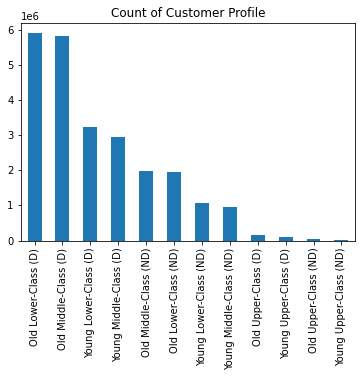

In [38]:
#create a bar chart of customer_profile
bar_1 = final_merged_excluded['customer_profile'].value_counts().plot.bar(title = 'Count of Customer Profile')

In [39]:
#aggregate max, mean, and min values on customer_profile level for usage frequency and expenditure
final_merged_excluded.groupby('customer_profile').agg({'user_order_num':['mean','min','max'],'prices':['mean','min','max']})

user_order_num              prices              
                                  mean min max        mean  min      max
customer_profile                                                        
Old Lower-Class (D)          21.741003   5  99    8.204036  1.0  99999.0
Old Lower-Class (ND)         22.061633   5  99    8.711886  1.0  99999.0
Old Middle-Class (D)         21.943885   5  99    9.998886  1.0  99999.0
Old Middle-Class (ND)        22.230279   5  99    9.694743  1.0  99999.0
Old Upper-Class (D)          23.249241   5  99  214.603684  1.0  99999.0
Old Upper-Class (ND)         25.778711   5  99  237.633693  1.0  99999.0
Young Lower-Class (D)        21.868804   5  99    7.656747  1.0  14900.0
Young Lower-Class (ND)       21.984683   5  99    7.650149  1.0  14900.0
Young Middle-Class (D)       22.083177   5  99    9.072821  1.0  99999.0
Young Middle-Class (ND)      21.738436   5  99    9.089777  1.0  99999.0
Young Upper-Class (D)        24.264154   5  99  264.589211  1.0  99999.0
Young Upper-Class (ND)       24.051463   5  96  338.772445  1.0  99999.0

There's something we didn't catch before. The average prices for upper class are skewed because of a bunch of price values at 99999 or 14900. Need to perform some cleaning.

#### Clean Prices Variable for Systematically Missing Values

In [40]:
prices_weird = final_merged_excluded[final_merged_excluded['prices']>50]

In [41]:
prices_weird['income_class'].value_counts()

Upper-Class     2835
Middle-Class     659
Lower-Class      184
Name: income_class, dtype: int64

In [42]:
final_merged_excluded['income_class'].value_counts()

Lower-Class     12152824
Middle-Class    11716007
Upper-Class       309014
Name: income_class, dtype: int64

Prices have a pattern of values containing either 14900 or 99999. These are likely mis-inputs or missing values. They mostly belong to the Upper-Class income group, but only make up less than 1 percent of the total prices. Since they are systematically missing/there's a common reason they have these values, we'll use imputation to fix them based on income groups. 

In [43]:
#find median prices for each group not including the systematically missing values
median_prices = final_merged_excluded[final_merged_excluded['prices']< 14900.0]

In [44]:
median_prices.groupby('income_class').agg({'prices':['median']})

,prices
,median
income_class,
Lower-Class,7.2
Middle-Class,7.7
Upper-Class,7.4


In [45]:
#impute values for prices of 14900 or 99999
final_merged_excluded.loc[(final_merged_excluded['prices']>=14900) & (final_merged_excluded['income_class']=='Lower-Class'), 'prices'] = 7.2
final_merged_excluded.loc[(final_merged_excluded['prices']>=14900) & (final_merged_excluded['income_class']=='Middle-Class'), 'prices'] = 7.7
final_merged_excluded.loc[(final_merged_excluded['prices']>=14900) & (final_merged_excluded['income_class']=='Upper-Class'), 'prices'] = 7.4                                                                      
                                                                      

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
final_merged_excluded[final_merged_excluded['prices']>=14900]

,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,num_dependants,fam_status,income,region,low_activity_customer,age_group,has_dependents,department,income_class,customer_profile


Alright, now that that's fixed, lets look at the aggregates again for each income class.

In [47]:
final_merged_excluded.groupby('income_class').agg({'user_order_num':['mean','min','max'],'prices':['mean','min','max']})


user_order_num            prices           
                       mean min max      mean  min   max
income_class                                            
Lower-Class       21.848208   5  99  7.635009  1.0  25.0
Middle-Class      22.010151   5  99  7.951844  1.0  25.0
Upper-Class       24.008737   5  99  7.795342  1.0  25.0

Well now it looks like there's not much of a difference between each group. The middle class spend the most on average.

### Customer Profile Exploration

In [48]:
#compare your customer profiles with regions and department
crosstab_region = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['region'], dropna = False)

In [49]:
crosstab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Old Lower-Class (D),1345958,1048127,1957313,1541547
Old Lower-Class (ND),465055,345531,640634,507153
Old Middle-Class (D),1389568,1045419,1912758,1481412
Old Middle-Class (ND),466222,335354,655217,509188
Old Upper-Class (D),39819,22441,44515,38847
Old Upper-Class (ND),10424,9284,17578,11510
Young Lower-Class (D),762336,552879,1079274,826665
Young Lower-Class (ND),237094,194099,367035,282124
Young Middle-Class (D),679906,531167,1001208,743184


Customer profiles across each region are the same proportionally, but there are a lot more customers over the age of 40 with dependents.

In [50]:
crosstab_dept = pd.crosstab(final_merged_excluded['department'], final_merged_excluded['customer_profile'], dropna = False)

In [51]:
crosstab_dept

customer_profile,Old Lower-Class (D),Old Lower-Class (ND),Old Middle-Class (D),Old Middle-Class (ND),Old Upper-Class (D),Old Upper-Class (ND),Young Lower-Class (D),Young Lower-Class (ND),Young Middle-Class (D),Young Middle-Class (ND),Young Upper-Class (D),Young Upper-Class (ND)
department,,,,,,,,,,,,
Alcohol,23528,8423,22859,8871,3665,1120,13626,4829,13126,3921,2344,681
Babies,77270,25665,85592,28339,1311,403,41218,13833,42958,15301,978,149
Bakery,207875,68984,213483,72851,7438,2126,114223,38792,108043,35238,4215,1231
Beverages,524015,171526,458696,156407,14599,4514,279716,94095,224519,77944,8002,2119
Breakfast,131243,43052,119852,40789,3872,1196,73027,24374,61065,19000,2323,536
Bulk,7487,2207,6158,2023,7,7,3779,1183,3415,1092,11,2
Canned Goods,180896,59594,198258,65180,4888,1756,100137,34290,99118,32032,3408,849
Dairy Eggs,972589,327456,997516,333312,25451,8743,536275,180156,512780,166332,16561,3976
Deli,186319,63743,187986,63941,4158,1573,103936,34876,94780,31060,2136,666


Text(0, 0.5, 'Customer Profile Count by Region')

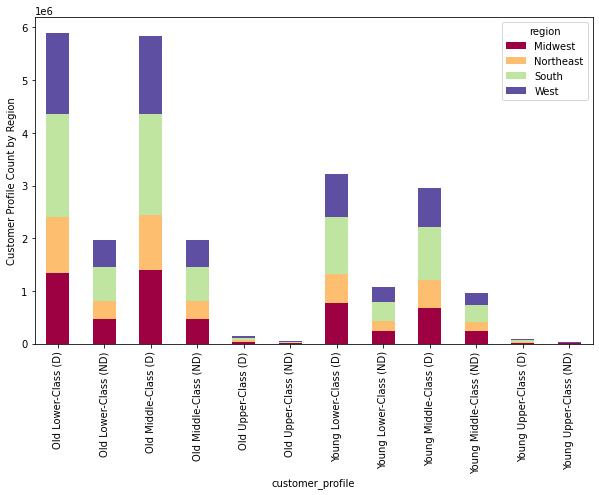

In [52]:
#create visualizations to demonstrate that behavior doesn't vary based on region or department.
bar_1 = crosstab_region.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('Customer Profile Count by Region')

In [75]:
#explore more visualizations with more crosstabs of just the flag variable profiles
crosstab_dependents = pd.crosstab(final_merged_excluded['department'], final_merged_excluded['has_dependents'], normalize = 'index', dropna = False).round(3)

Text(0, 0.5, '')

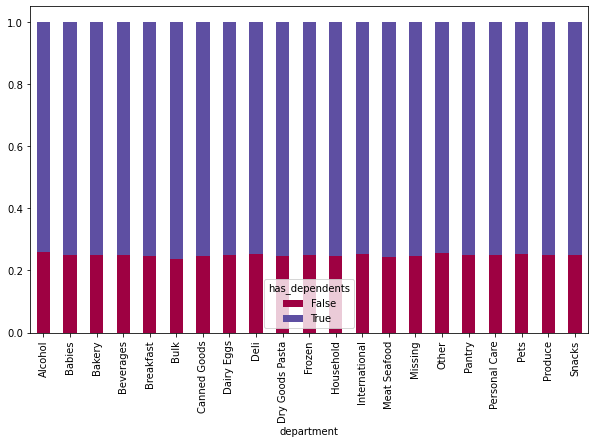

In [76]:
bar_2 = crosstab_dependents.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('')

This confirms the theory that most of our customers have dependents.

In [55]:
crosstab_3 = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['fam_status'], dropna = False)


Text(0, 0.5, '')

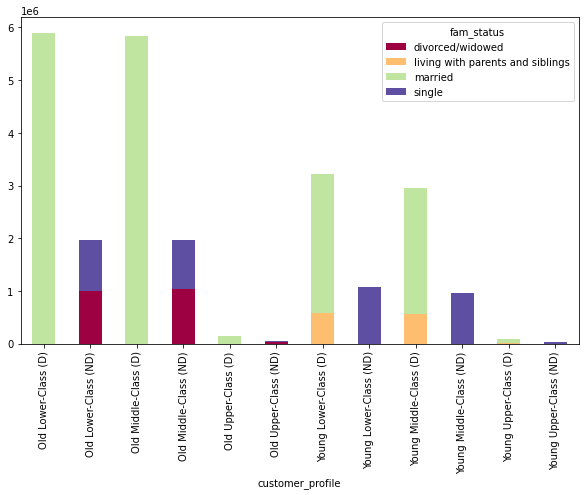

In [56]:
bar_3 = crosstab_3.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('')

Obviously married individuals are going to be the ones making up the group that has dependents. Divorced/widowed is only in above 40, and living with parents/siblings is only in under 40.

In [57]:
#is there a difference in how many orders are made between having dependents and not having dependents?

In [58]:
sub_1 = final_merged_excluded[final_merged_excluded['has_dependents']==True].groupby('department').agg({'user_order_num':['mean']})


In [59]:
sub_2 = final_merged_excluded[final_merged_excluded['has_dependents']==False].groupby('department').agg({'user_order_num':['mean']})


In [60]:
sub_1

,user_order_num
,mean
department,
Alcohol,20.170895
Babies,23.632599
Bakery,21.990944
Beverages,21.877500
Breakfast,21.602963
Bulk,24.726087
Canned Goods,20.946268
Dairy Eggs,22.349751


In [61]:
sub_2

,user_order_num
,mean
department,
Alcohol,22.157551
Babies,23.994910
Bakery,21.981708
Beverages,22.130257
Breakfast,21.744143
Bulk,24.747774
Canned Goods,21.411955
Dairy Eggs,22.514710


In [62]:
sub_1 = sub_1.droplevel(level=0, axis=1)

In [63]:
sub_2 = sub_2.droplevel(level=0, axis=1)

In [64]:
sub_1 = sub_1.rename(columns = {'mean':'d_mean_orders'})

In [65]:
sub_2 = sub_2.rename(columns = {'mean':'nd_mean_orders'})

In [66]:
dept_orders = pd.concat([sub_1,sub_2], axis = 1)

In [67]:
dept_orders

,d_mean_orders,nd_mean_orders
department,,
Alcohol,20.170895,22.157551
Babies,23.632599,23.994910
Bakery,21.990944,21.981708
Beverages,21.877500,22.130257
Breakfast,21.602963,21.744143
Bulk,24.726087,24.747774
Canned Goods,20.946268,21.411955
Dairy Eggs,22.349751,22.514710
Deli,21.244125,21.369567


Text(0, 0.5, '')

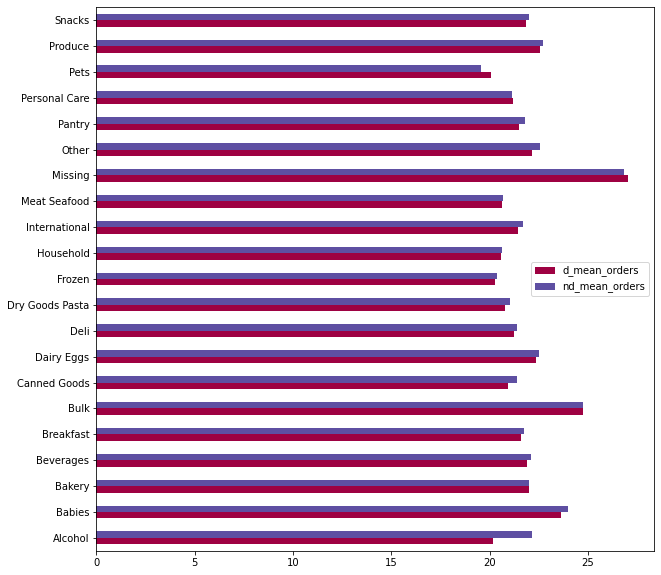

In [68]:
bar_5 = dept_orders.plot(kind='barh', 
                    colormap='Spectral', 
                    figsize=(10, 10))
plt.pyplot.ylabel('')

In [72]:
#are there differences in ordering habits based on customer's region?
final_merged_excluded.groupby('region').agg({'user_order_num':['mean'],'prices':['mean']})

,user_order_num,prices
,mean,mean
region,,
Midwest,21.705070,7.791340
Northeast,22.026023,7.781908
South,21.970386,7.794971
West,22.111398,7.790193


No differences here.

In [73]:
#create another flag variable based on age and family status.
#living at home is only found in Young, and divorced/widowed is only found in Old. Save a few lines

final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['fam_status']=='single'), 'age_fam_status'] = 'Single Adult (Y)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['fam_status']=='married'), 'age_fam_status'] = 'Married Adult (Y)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['fam_status']=='living with parents and siblings'), 'age_fam_status'] = 'Living at Home (Y)'

final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['fam_status']=='single'), 'age_fam_status'] = 'Single Adult (O)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['fam_status']=='married'), 'age_fam_status'] = 'Married Adult (O)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['fam_status']=='divorced/widowed'), 'age_fam_status'] = 'Divorced/Widowed (O)'



/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [74]:
#is there a connection between age and family status in terms of ordering habits?
final_merged_excluded.groupby('age_fam_status').agg({'user_order_num':['mean'],'prices':['mean']})

,user_order_num,prices
,mean,mean
age_fam_status,,
Divorced/Widowed (O),22.108366,7.803775
Living at Home (Y),22.118238,7.801504
Married Adult (O),21.859161,7.791956
Married Adult (Y),21.978776,7.783832
Single Adult (O),22.279969,7.787817
Single Adult (Y),21.893464,7.782675


No differences here either.

In [83]:
#customer frequency
crosstab_frequency = pd.crosstab(final_merged_excluded['department'], final_merged_excluded['frequency_flag'], normalize = 'index', dropna = False).round(3)


Text(0, 0.5, '')

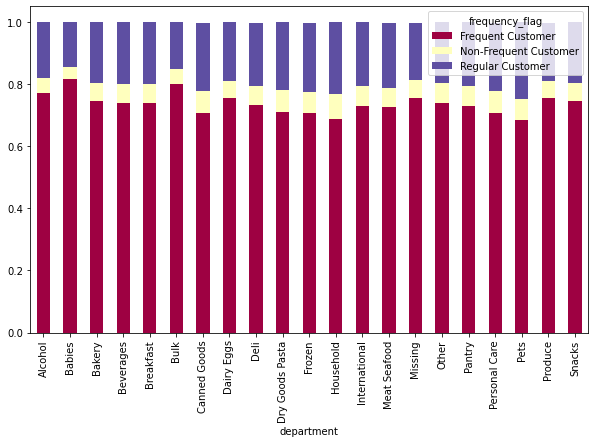

In [84]:
bar_6 = crosstab_frequency.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('')

In [86]:
final_merged_excluded.groupby('frequency_flag').agg({'prices':['mean']})

,prices
,mean
frequency_flag,
Frequent Customer,7.790466
Non-Frequent Customer,7.781591
Regular Customer,7.793782


In [69]:
#export visualizations
bar_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_region.png'))

In [70]:
bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_dept.png'))

In [71]:
bar_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_fam_status.png'))

In [62]:
bar_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_dept_orders.png'))